# Hypothesis Testing

- Robert Yonce
- 5/17/23

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
df = pd.read_csv('tmdb_results_combined.csv.gz')
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
1,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.115,2191.0,PG
2,tt0119273,0.0,/f5C03doOWiauu37bToKXtpgP5bS.jpg,"{'id': 141086, 'name': 'Heavy Metal Collection...",15000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,16225.0,en,Heavy Metal 2000,...,0.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,not to survive the fight in the external world...,Heavy Metal 2000,0.0,6.092,180.0,R
3,tt0120263,0.0,/ynXVuylP8upazjz8lrqb1PEMkdR.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,34070.0,sv,Sånger från andra våningen,...,80334.0,98.0,"[{'english_name': 'Russian', 'iso_639_1': 'ru'...",Released,NaN,Songs from the Second Floor,0.0,7.166,238.0,NaN
4,tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,...,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.500,44.0,R


In [3]:
# Files

results_21 = pd.read_csv('data/final_tmdb_data_2021.csv.gz', engine='python')

results_20 = pd.read_csv('data/final_tmdb_data_2020.csv.gz', engine='python')

results_19 = pd.read_csv('data/final_tmdb_data_2019.csv.gz', engine='python')

results_18 = pd.read_csv('data/final_tmdb_data_2018.csv.gz', engine='python')

In [4]:
df3 = pd.read_csv('data/title_ratings.csv.gz')
df3.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1965
1,tt0000002,5.8,263
2,tt0000005,6.2,2607
3,tt0000006,5.2,181
4,tt0000007,5.4,816


## DFs

In [5]:
# Take down to columns I need for Question 1

df = df[['imdb_id', 'revenue', 'budget', 'certification']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        637 non-null    object 
 1   revenue        637 non-null    float64
 2   budget         637 non-null    float64
 3   certification  430 non-null    object 
dtypes: float64(2), object(2)
memory usage: 20.0+ KB


In [6]:
# Combined DFs for question 2

frames = [results_21, results_20, results_19, results_18]

df4 = pd.concat(frames)
df4.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0199602,0.0,/fOnjxCbR3Poar7voHcaQrvYqQMH.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,894346.0,en,Holy Hollywood,...,0.0,82.0,[],Released,NaN,Holy Hollywood,0.0,0.000,0.0,NaN
2,tt0293429,0.0,/9yBVqNruk6Ykrwc32qrK2TIE5xw.jpg,"{'id': 931431, 'name': 'Mortal Kombat (Reboot)...",20000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...",https://www.mortalkombatmovie.net,460465.0,en,Mortal Kombat,...,84426031.0,110.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,Get over here.,Mortal Kombat,0.0,7.096,5224.0,R
3,tt0499097,0.0,/fPGeS6jgdLovQAKunNHX8l0avCy.jpg,NaN,0.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://www.amazon.com/dp/B08VFD1Y3B,567189.0,en,Tom Clancy's Without Remorse,...,0.0,109.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,From the author of Rainbow Six.,Tom Clancy's Without Remorse,0.0,7.039,2166.0,R
4,tt0870154,0.0,/7WJjFviFBffEJvkAms4uWwbcVUk.jpg,"{'id': 861429, 'name': 'Jungle Cruise Collecti...",200000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://movies.disney.com/jungle-cruise,451048.0,en,Jungle Cruise,...,220889446.0,127.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Jungle Cruise,0.0,7.445,4973.0,PG-13


In [7]:
# To the columns I need

df4 = df4[['imdb_id', 'revenue', 'budget', 'certification']]
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17488 entries, 0 to 4676
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        17488 non-null  object 
 1   revenue        17459 non-null  float64
 2   budget         17471 non-null  object 
 3   certification  3196 non-null   object 
dtypes: float64(1), object(3)
memory usage: 683.1+ KB


In [8]:
# DF I need for Question 3

df2 = pd.merge(df4, df3, left_on = 'imdb_id', right_on = 'tconst')

df2.head()

,imdb_id,revenue,budget,certification,tconst,averageRating,numVotes
0,tt0199602,0.0,0.0,NaN,tt0199602,6.6,35
1,tt0293429,84426031.0,20000000.0,R,tt0293429,6.0,179716
2,tt0499097,0.0,0.0,R,tt0499097,5.8,60719
3,tt0870154,220889446.0,200000000.0,PG-13,tt0870154,6.6,198156
4,tt0993840,780000.0,0.0,R,tt0993840,5.7,177425


In [9]:
df2.isna().sum()

imdb_id              0
revenue              4
budget               0
certification    13538
tconst               0
averageRating        0
numVotes             0
dtype: int64

In [10]:
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3093 entries, 1 to 16620
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        3093 non-null   object 
 1   revenue        3093 non-null   float64
 2   budget         3093 non-null   object 
 3   certification  3093 non-null   object 
 4   tconst         3093 non-null   object 
 5   averageRating  3093 non-null   float64
 6   numVotes       3093 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 193.3+ KB


In [11]:
# Bins for ratings for question 3

bins = [0, 3, 5.5, 8,np.inf]
names = np.array(['<3', '3-5.5', '5.5-8', '8-10'])
df2['rate_cat'] = names[np.searchsorted(bins, df2['averageRating'])-1]

## Clean out certification column

In [12]:
# Drop NaN certification

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 1 to 628
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        430 non-null    object 
 1   revenue        430 non-null    float64
 2   budget         430 non-null    float64
 3   certification  430 non-null    object 
dtypes: float64(2), object(2)
memory usage: 16.8+ KB


In [13]:
# Drop NaN certification

df4 = df4.dropna()
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3196 entries, 2 to 4662
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        3196 non-null   object 
 1   revenue        3196 non-null   float64
 2   budget         3196 non-null   object 
 3   certification  3196 non-null   object 
dtypes: float64(1), object(3)
memory usage: 124.8+ KB


In [14]:
# Make budget a float

df4['budget'] = df4['budget'].astype('float')

In [15]:
# Filter out NR

nr = df['certification'] != 'NR'
df = df[nr]


In [16]:
# Filter out NR

nr4 = df4['certification'] != ('NR' and 'NC-17')
df4 = df4[nr4]

## Hypothesis Test # 1
    - Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

### Null Hypothesis and Alternate Hypothesis

- Null Hypothesis: Ratings have the same revenue.

- Alternate Hypothesis: Ratings have different revenues.

- alpha = .05

In [17]:
# Create groups dictionary. 

groups = {}
## Loop through all unique categories

for i in df['certification'].unique():
    ## Get series for group and rename
    data = df.loc[df['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['PG', 'R', 'G', 'PG-13'])

### Normal Test

In [18]:
# Running normal test on each group and to see if there are >15 in each group

norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

/Users/robertyonce/anaconda3/envs/dojo-env/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,n,p,test stat
PG,35.0,4.205459e-11,47.784105
R,232.0,8.450537e-42,189.148688
G,15.0,6.895335e-06,23.769331
PG-13,131.0,4.474506e-20,89.106612


- Since there are more than 15, we can ignore the normality test

### Variance Test

In [19]:
# With the * operator for variance test 

stats.levene(*groups.values())

LeveneResult(statistic=10.516454385916681, pvalue=1.1213059640345886e-06)

- We did not meet the variance test

### Hypothesis Test

In [20]:
# perform the correct hypothesis test

result = stats.kruskal( *groups.values())
result

KruskalResult(statistic=68.99029217761759, pvalue=7.021759983704768e-15)

### Interpret your p-value and reject or fail to reject your null hypothesis 

- The p-value is lower so we can reject the null hypothesis

### Visual

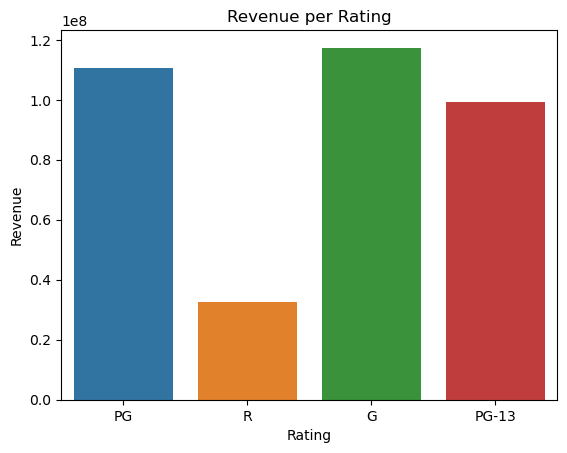

In [21]:
ax = sns.barplot(data=df, x='certification',y= 'revenue', errorbar = None)
ax.set_title('Revenue per Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Revenue');

## Hypothesis Test # 2

    - Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much budget is for the movie? (Years 2018-21) 

### Null Hypothesis and Alternate Hypothesis

- Null Hypothesis: Ratings have the same budget.

- Alternate Hypothesis: Ratings have different budgets.

- alpha = .05

In [22]:
# Create groups dictionary. 

groups4 = {}
## Loop through all unique categories

for i in df4['certification'].unique():
    ## Get series for group and rename
    data4 = df4.loc[df4['certification']==i,'budget'].copy()
    
    # save into the dictionary
    groups4[i] = data4
groups4.keys()

dict_keys(['R', 'PG-13', 'NR', 'PG', 'G'])

### Normal Test

In [23]:
# Running normal test on each group and to see if there are >15 in each group

norm_results4 = {}
for i, data4 in groups4.items():
    stat, p = stats.normaltest(data4)
    ## save the p val, test statistic, and the size of the group
    norm_results4[i] = {'n': len(data4),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results4_df = pd.DataFrame(norm_results4).T
norm_results4_df

,n,p,test stat
R,1154.0,0.000000e+00,2142.215840
PG-13,599.0,5.118315e-94,429.620347
NR,992.0,0.000000e+00,1894.204873
PG,311.0,6.537180e-44,198.872476
G,102.0,3.908702e-47,213.716588


- Since there are more than 15, we can ignore the normality test

### Variance Test

In [24]:
# With the * operator for variance test 

stats.levene(*groups4.values())

LeveneResult(statistic=50.829923613531655, pvalue=1.58251484025079e-41)

- We did not meet the variance test

### Hypothesis Test

In [30]:
# perform the correct hypothesis test

result = stats.kruskal( *groups4.values())
result

KruskalResult(statistic=146.22833250574084, pvalue=1.308646279495321e-30)

### Interpret your p-value and reject or fail to reject your null hypothesis 

- The p-value is lower so we can reject the null hypothesis

### Visual

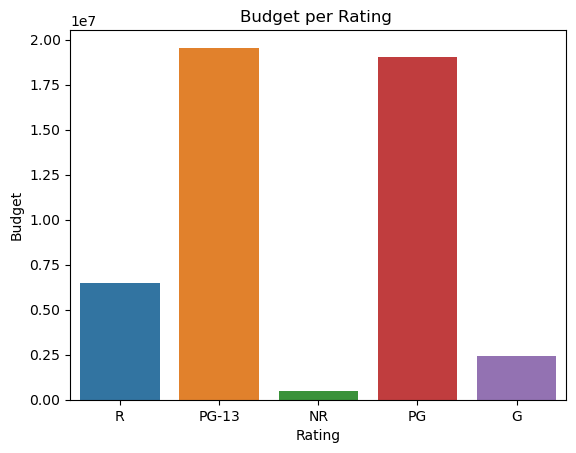

In [26]:
ax = sns.barplot(data=df4, x='certification',y= 'budget', errorbar = None)
ax.set_title('Budget per Rating ')
ax.set_xlabel('Rating')
ax.set_ylabel('Budget');

## Hypothesis Test # 3

    - Does the average rating affect the revenue for a movie?

### Null Hypothesis and Alternate Hypothesis

- Null Hypothesis: The average rating does not impact the revenue for a movie.

- Alternate Hypothesis: The average rating does impact the revenue for a movie.

- alpha = .05

In [27]:
# Create groups dictionary. 

groups2 = {}
## Loop through all unique categories

for i in df2['rate_cat'].unique():
    ## Get series for group and rename
    data2 = df2.loc[df2['rate_cat']==i,'revenue'].copy()
    
    # save into the dictionary
    groups2[i] = data2
groups2.keys()

dict_keys(['5.5-8', '3-5.5', '8-10', '<3'])

### Normal Test

In [28]:
# Running normal test on each group and to see if there are >15 in each group

norm_results2 = {}
for i, data2 in groups2.items():
    stat, p = stats.normaltest(data2)
    ## save the p val, test statistic, and the size of the group
    norm_results2[i] = {'n': len(data2),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results2_df = pd.DataFrame(norm_results2).T
norm_results2_df

,n,p,test stat
5.5-8,1601.0,0.000000e+00,1944.759610
3-5.5,1272.0,0.000000e+00,2504.857613
8-10,80.0,1.012009e-23,105.895038
<3,140.0,9.023706e-67,304.146692


- Since there are more than 15, we can ignore the normality test

### Variance Test

In [29]:
# With the * operator for variance test 

stats.levene(*groups2.values())

LeveneResult(statistic=35.12717078418843, pvalue=2.561985660141488e-22)

- We did not meet the variance test

### Hypothesis Test

In [31]:
# perform the correct hypothesis test

result = stats.kruskal( *groups2.values())
result

KruskalResult(statistic=247.65008689744087, pvalue=2.108965009282718e-53)

### Interpret your p-value and reject or fail to reject your null hypothesis 

- The p-value is lower so we can reject the null hypothesis

### Visual

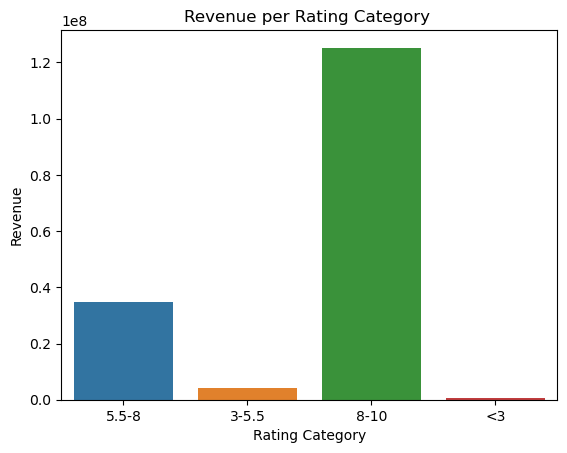

In [32]:
ax = sns.barplot(data=df2, x='rate_cat',y= 'revenue', errorbar = None)
ax.set_title('Revenue per Rating Category ')
ax.set_xlabel('Rating Category')
ax.set_ylabel('Revenue');